# Preamble

Let's set up the environment first. We need the coingecko API to fetch prices, and pandas to work with timeseries (and tabular data in general).

In [2]:
from pycoingecko import CoinGeckoAPI
gecko = CoinGeckoAPI()

In [9]:
import pandas as pd

In [114]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [69]:
import datetime as dt

# Basic

## Ping

Is coingecko up?

In [38]:
if gecko.ping()['gecko_says'].find('To the Moon!') != -1:
    print ("CoinGecko is up!")
else:
    print ("CoinGecko is down...")

CoinGecko is up!


Congrats?!

## List of coins

Let's see what assets we have to work with.

In [26]:
coins_list = pd.DataFrame(gecko.get_coins_list())

Is BTC present in this list? Is FLOW? Just a sanity check.

In [41]:
coins_list.loc[coins_list.applymap(lambda x: x == "btc").any(axis=1)]

id symbol     name
809  bitcoin    btc  Bitcoin

In [40]:
coins_list.loc[coins_list.applymap(lambda x: x == "flow").any(axis=1)]

id symbol  name
2457  flow   flow  Flow

Seems so.

## Price

What about their current market price? (And other data?)

In [80]:
p = gecko.get_price('bitcoin,ethereum,flow', 'usd', include_market_cap='true', include_24hr_vol='true', include_24hr_change='true', include_last_updated_at='true')

for key in p:
    print ("{}:".format(key.capitalize()))
    print ("\tPrice: ${}, Market Cap: ${}".format(p[key]['usd'], p[key]['usd_market_cap']))
    print ("\t24Hr Change: {:.2f}%, 24Hr Volume: {:.2f}".format(p[key]['usd_24h_change'], p[key]['usd_24h_vol']))
    print ("\t(Last updated at {} UTC)".format(dt.datetime.utcfromtimestamp(p[key]['last_updated_at'])))
    print ()

Bitcoin:
	Price: $56366, Market Cap: $1048775494095.7839
	24Hr Change: 3.20%, 24Hr Volume: 47613266908.91
	(Last updated at 2021-03-27 21:53:37 UTC)

Ethereum:
	Price: $1728.32, Market Cap: $199025398969.79926
	24Hr Change: 2.31%, 24Hr Volume: 21377093874.10
	(Last updated at 2021-03-27 21:52:54 UTC)

Flow:
	Price: $27.93, Market Cap: $915053170.8916276
	24Hr Change: -2.35%, 24Hr Volume: 59084374.80
	(Last updated at 2021-03-27 21:53:04 UTC)



# Historical price charts

Finally, let us chart the price for the past 2 years.

In [88]:
p = gecko.get_coin_market_chart_by_id('bitcoin', 'usd', days=730)

<IPython.core.display.Javascript object>


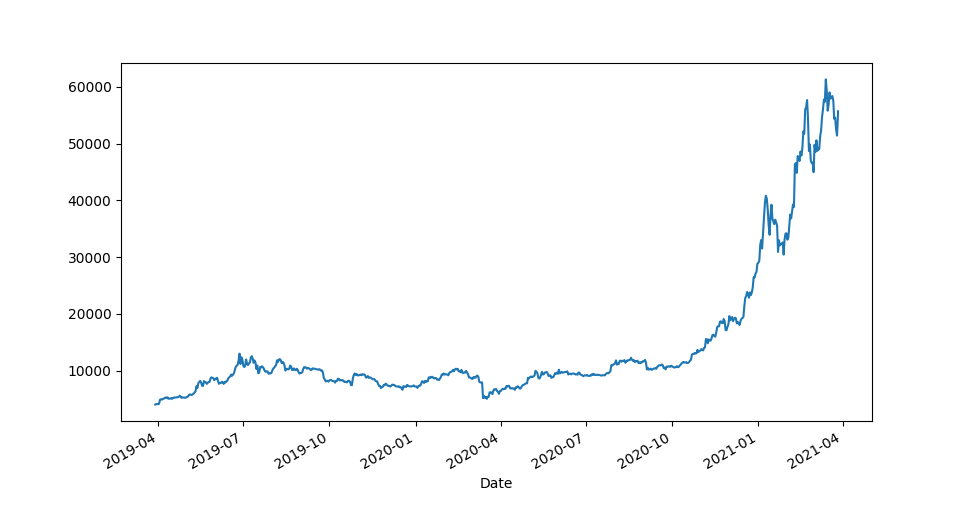

In [115]:
df = pd.DataFrame(p['prices'], columns=['Date (Raw)', 'Price'])
df.index = pd.to_datetime(df['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
df.index.name = 'Date'

fig = plt.figure(); df['Price'].plot(figure=fig);

That's the chart of BTCUSD over the past two years. Really should've bought some, shouldn't we?

Next, the chart of the total volume per day. Notice the cyclical nature.

<IPython.core.display.Javascript object>


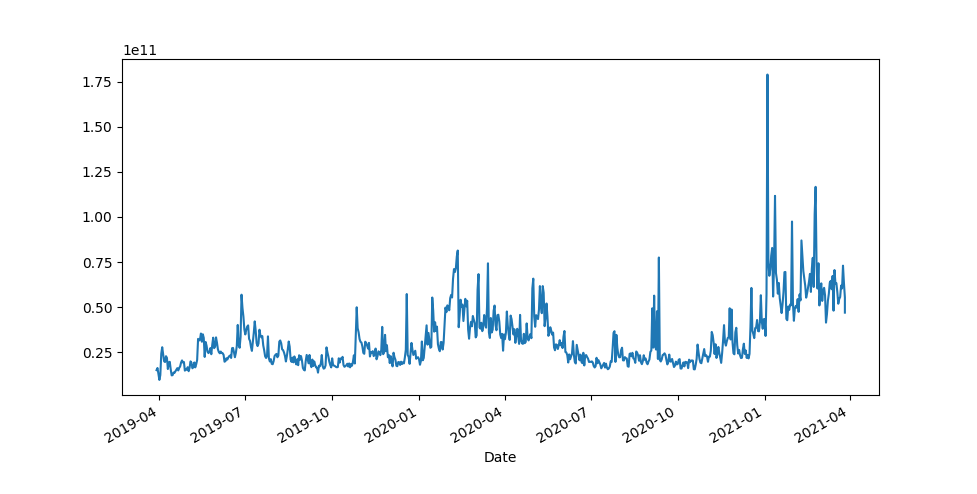

In [119]:
df = pd.DataFrame(p['total_volumes'], columns=['Date (Raw)', 'Volume'])
df.index = pd.to_datetime(df['Date (Raw)'].apply(lambda x: dt.datetime.utcfromtimestamp(x/1000).date()))
df.index.name = 'Date'

fig = plt.figure(); df['Volume'].plot(figure=fig);